# Exploratory Data Analysis

## Library Imports

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Setting up the paths:

In [1]:
data_path = 'C:/Data/HiSeqV2'
label_path = 'C:/Data/TCGA_phenotype_denseDataOnlyDownload.tsv'

## Loading the Dataset:

In [4]:
df = pd.read_csv(data_path, sep = '\t').transpose()

### Cleanup:

In [ ]:
df.columns = df.iloc[0]
df = df.drop('Sample', axis = 0)

### Data Head:

In [10]:
df.head()

Sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-S9-A7J2-01,10.9576,4.8099,0.4657,11.2675,10.1761,10.4769,13.0456,3.2299,0.4657,8.7533,...,0,1.3357,2.9741,0,9.2594,9.4779,6.1595,9.6465,0,9.4848
TCGA-G3-A3CH-11,11.0186,5.3847,0,11.669,11.398,10.8249,11.5487,3.5408,1.4714,7.9144,...,0,3.5408,5.5302,0,7.5066,10.5302,7.3741,13.0045,7.0466,10.3411
TCGA-EK-A2RE-01,9.7106,2.8888,0.4192,11.4903,11.7371,9.9473,10.841,2.5988,0,3.9541,...,0.7436,0,2.953,1.2319,9.5217,13.8492,6.5812,9.2958,0.4192,9.745
TCGA-44-6778-01,9.6205,7.9642,1.5378,11.8432,11.0531,10.9005,12.4145,4.5366,2.0609,4.1805,...,0,2.0609,6.1839,4.1291,8.9832,12.3412,9.0862,10.4779,9.4517,10.4395
TCGA-VM-A8C8-01,11.6596,8.5622,0,11.2677,11.3549,10.8579,13.256,5.9962,0,5.357,...,1.3549,0,4.753,0.6034,9.0573,8.8984,5.9116,9.9584,1.6216,9.6811


## Counting the number of elements/features:

In [6]:
n_total = df.shape[0]
n_feat = df.shape[1]
print('Total Number of Samples: %d'%n_total)
print('Total Number of Features/Sample: %d'%n_feat)

Total Number of Samples: 10459
Total Number of Features/Sample: 20530


## Information of the dataframe:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10459 entries, TCGA-S9-A7J2-01 to TCGA-FV-A3I0-11
Columns: 20530 entries, ARHGEF10L to SELS
dtypes: object(20530)
memory usage: 1.6+ GB


## Describing the Dataframe:

In [9]:
df.describe()

Sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
count,10459.0,10459.0,10459.0,10459.0000,10459.0000,10459.000,10459.0000,10459.0,10459.0,10459.0,...,10459.0,10459.0,10459.0,10459.0,10459.0000,10459.0000,10459.0,10459.0000,10459.0,10459.0000
unique,9042.0,9772.0,3131.0,7275.0000,8343.0000,8403.000,8324.0000,9300.0,3582.0,9584.0,...,5166.0,6342.0,9275.0,5000.0,8511.0000,9417.0000,9372.0,8846.0000,9527.0,8311.0000
top,0.0,0.0,0.0,11.8026,11.5029,10.475,12.3423,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.9887,11.9286,0.0,11.3264,0.0,9.9226
freq,8.0,158.0,6949.0,7.0000,5.0000,6.000,6.0000,161.0,6147.0,37.0,...,4068.0,3448.0,10.0,5122.0,6.0000,4.0000,17.0,5.0000,272.0,6.0000


## Loading the Labels:

In [11]:
label_df = pd.read_csv(label_path, sep = '\t')
label_df = label_df.set_index('sample')

In [12]:
label_df.head()

,sample_type_id,sample_type,_primary_disease
sample,,,
TCGA-D3-A1QA-07,7.0,Additional Metastatic,skin cutaneous melanoma
TCGA-DE-A4MD-06,6.0,Metastatic,thyroid carcinoma
TCGA-J8-A3O2-06,6.0,Metastatic,thyroid carcinoma
TCGA-J8-A3YH-06,6.0,Metastatic,thyroid carcinoma
TCGA-EM-A2P1-06,6.0,Metastatic,thyroid carcinoma


## List of Diseases:

In [13]:
label_df._primary_disease.unique()

array(['skin cutaneous melanoma', 'thyroid carcinoma', 'sarcoma',
       'prostate adenocarcinoma', 'pheochromocytoma & paraganglioma',
       'pancreatic adenocarcinoma', 'head & neck squamous cell carcinoma',
       'esophageal carcinoma', 'colon adenocarcinoma',
       'cervical & endocervical cancer', 'breast invasive carcinoma',
       'bladder urothelial carcinoma', 'testicular germ cell tumor',
       'kidney papillary cell carcinoma', 'kidney clear cell carcinoma',
       'acute myeloid leukemia', 'rectum adenocarcinoma',
       'ovarian serous cystadenocarcinoma', 'lung adenocarcinoma',
       'liver hepatocellular carcinoma',
       'uterine corpus endometrioid carcinoma', 'glioblastoma multiforme',
       'brain lower grade glioma', 'uterine carcinosarcoma', 'thymoma',
       'stomach adenocarcinoma', 'diffuse large B-cell lymphoma',
       'lung squamous cell carcinoma', 'mesothelioma',
       'kidney chromophobe', 'uveal melanoma', 'cholangiocarcinoma',
       'adrenocorti

## Value counts for Diseases:

In [16]:
label_df._primary_disease.value_counts()

breast invasive carcinoma                1241
kidney clear cell carcinoma               944
lung adenocarcinoma                       705
ovarian serous cystadenocarcinoma         627
lung squamous cell carcinoma              626
glioblastoma multiforme                   614
head & neck squamous cell carcinoma       604
uterine corpus endometrioid carcinoma     595
stomach adenocarcinoma                    581
thyroid carcinoma                         580
prostate adenocarcinoma                   566
colon adenocarcinoma                      548
brain lower grade glioma                  530
skin cutaneous melanoma                   480
liver hepatocellular carcinoma            438
bladder urothelial carcinoma              436
kidney papillary cell carcinoma           352
cervical & endocervical cancer            313
sarcoma                                   271
esophageal carcinoma                      204
acute myeloid leukemia                    200
pancreatic adenocarcinoma         

## Data Visualization:

### Checking missing data:

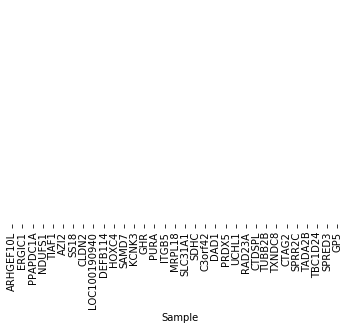

In [19]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### Checking Correlation:

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 432x288 with 0 Axes>

### Check Outliers:

In [24]:
l = df.columns.values
number_of_columns=n_feat
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

ValueError: Image size of 1478160x7390799 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000145F1765B70> (for post_execute):


ValueError: Image size of 1478160x7390799 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1478160x7390799 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1.47816e+06x7.3908e+06 with 1 Axes>

### Distribution Skewness

In [25]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

C:\Users\suhai\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\suhai\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000145F1765B70> (for post_execute):


ValueError: Image size of 2956320x7390799 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 2956320x7390799 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2.95632e+06x7.3908e+06 with 2223 Axes>

### Visualizations failed due to large feature size